This assignment makes use of a data file that contains measurements of different parts of a flower. According to the measurements of these parts, flowers are then categorized into one of three classes. The relevant parts that are measured to determine the class of the flower are:
* The sepal length.
* The sepal width.
* The petal length.
* The petal width.

Sepals typically function as protection for the flower in bud, and often as support for the petals when in bloom.
You are expected to create a model that will be able to classify a flowers by class when given the measurments for the sepals and petals.

In [18]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**1.** Read the data file "flowers.csv" into a dataframe called "flowers". The columns contain the following information:
* Column 1: sepal length.
* Column 2: sepal width.
* Column 3: petal length.
* Column 4: petal width.
* Column 5: class.

Name the columns accordingly.

[2 Marks]

In [19]:
# Load flowers
flowers = pd.read_csv('flowers.csv', names = ['sepal-length',
                                           'sepal-width',
                                           'petal-length',
                                           'petal-width',
                                           'class'])

**2.** Check the data for any faulty values and handle all the data errors by cleaning the data. Show the data before and after it has been cleaned.

[8 Marks]

<AxesSubplot:xlabel='class', ylabel='petal-width'>

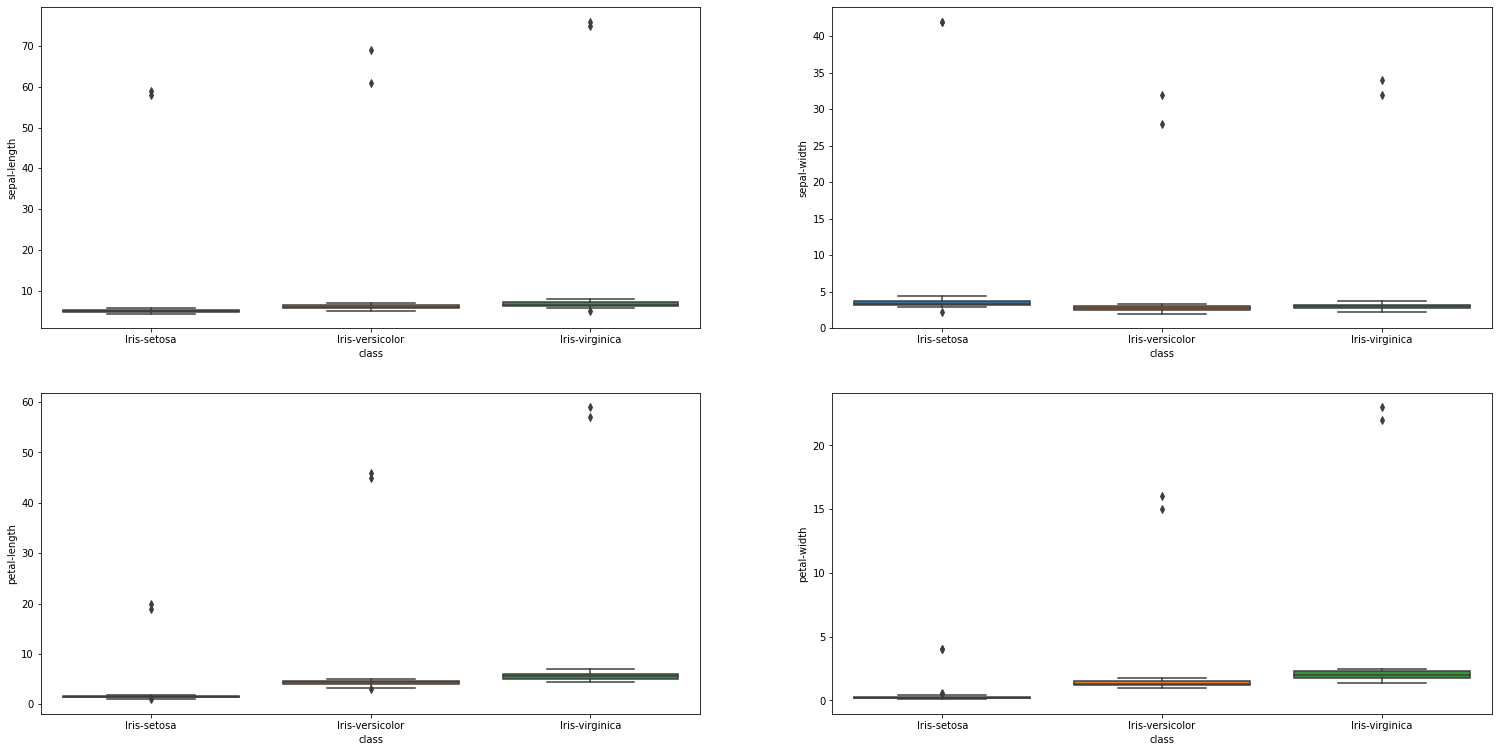

In [4]:
#Checking for falut values , DUplicates, Outliers,
import seaborn as sns
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (26, 13))
sns.boxplot(x = "class", y = "sepal-length", data = flowers, ax = axes[0,0])
sns.boxplot(x = "class", y = "sepal-width", data = flowers, ax = axes[0,1])
sns.boxplot(x = "class", y = "petal-length", data = flowers, ax = axes[1,0])
sns.boxplot(x = "class", y = "petal-width", data = flowers, ax = axes[1,1])

In [5]:
flowers.drop_duplicates(inplace=True)

std_sl = flowers["sepal-length"].std()

flowers.drop(flowers["sepal-length"].index[
            (flowers["sepal-length"] > flowers["sepal-length"].median() + (std_sl*2.5)) |
            (flowers["sepal-length"] < flowers["sepal-length"].median() - (std_sl*2.5)) ], inplace=True)

<AxesSubplot:xlabel='class', ylabel='petal-width'>

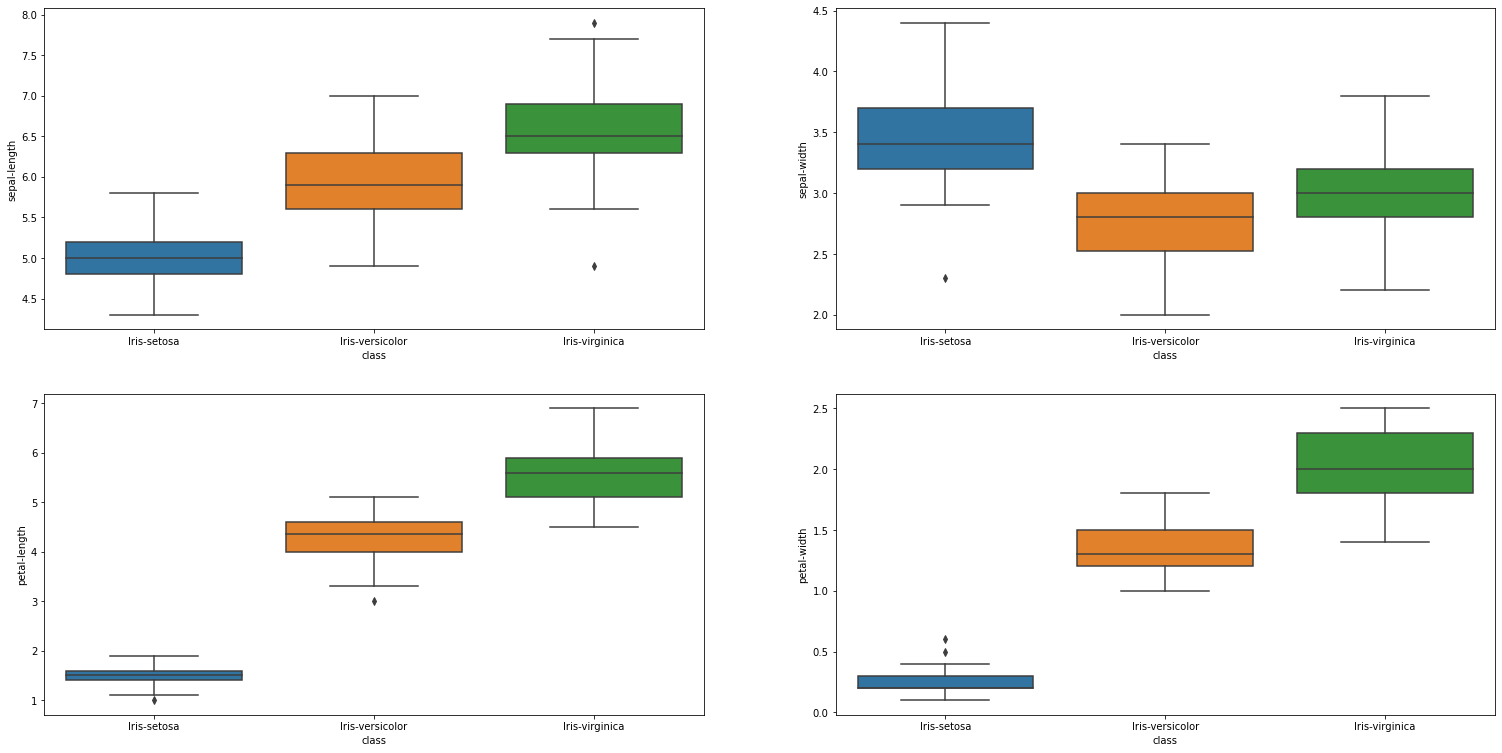

In [6]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (26, 13))
sns.boxplot(x = "class", y = "sepal-length", data = flowers, ax = axes[0,0])
sns.boxplot(x = "class", y = "sepal-width", data = flowers, ax = axes[0,1])
sns.boxplot(x = "class", y = "petal-length", data = flowers, ax = axes[1,0])
sns.boxplot(x = "class", y = "petal-width", data = flowers, ax = axes[1,1])

**3.** Summarize the dataset by:
* Getting the dimentions of the dataset
* Looking at (Displaying) the content of the dataset.
* Generating a statistical summary of all the attributes.
* Providing a breakdown of the data by class variable.

[4 Marks]

In [7]:
# shape
print(flowers.shape)

(147, 5)


In [8]:
# head
print(flowers.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [9]:
# descriptions
print(flowers.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
# class distribution - A break down, "each item"
print(flowers.groupby('class').size())

class
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64


**4.** Visualise the data by creating:
* Univariate plots (i.e. box plots and histograms) to better understand each attribute.
* Multivariate plots (i.e. scatterplots for all attribute pairs) to better understand the relationships between attributes.

[6 Marks]

<AxesSubplot:xlabel='class', ylabel='petal-width'>

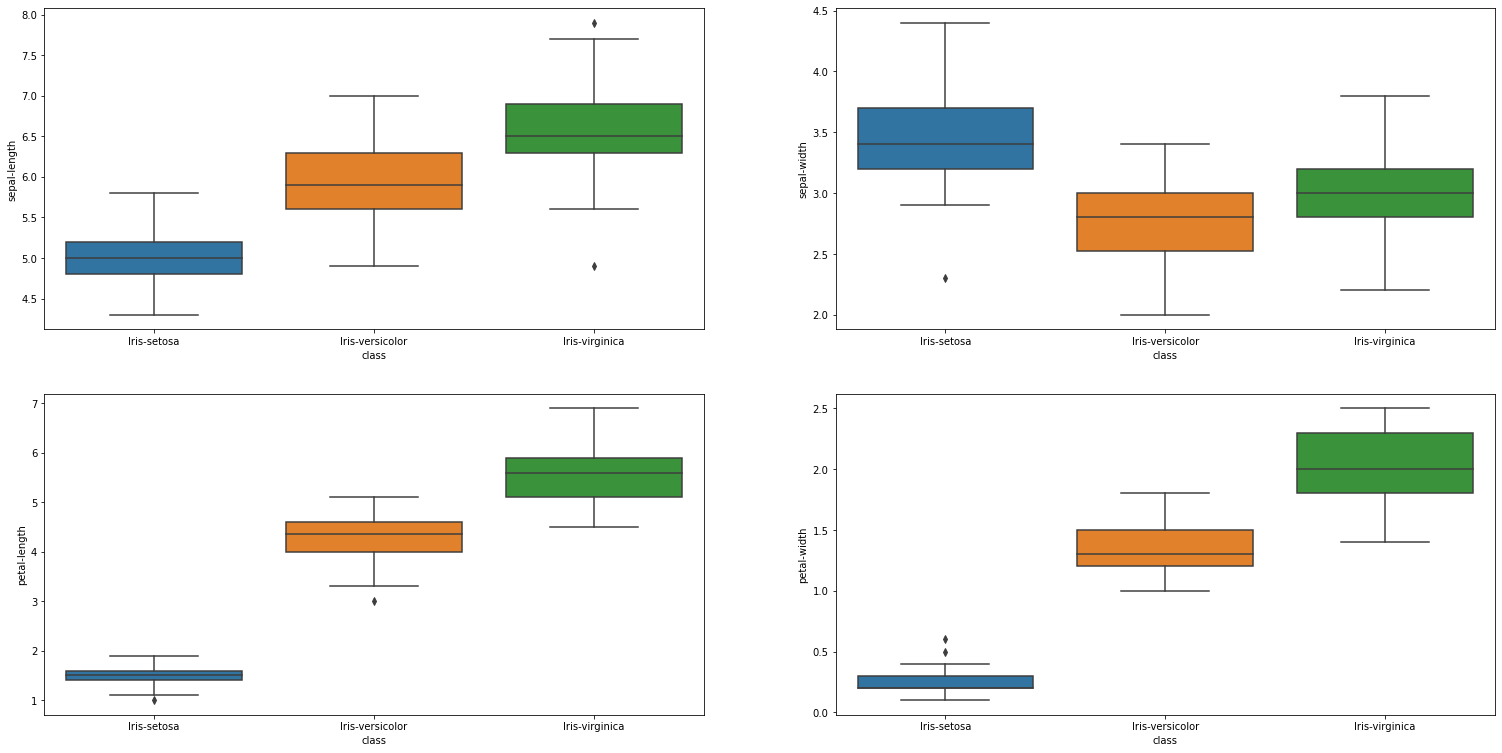

In [11]:
# box and whisker plots # each attribute
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (26, 13))
sns.boxplot(x = "class", y = "sepal-length", data = flowers, ax = axes[0,0])
sns.boxplot(x = "class", y = "sepal-width", data = flowers, ax = axes[0,1])
sns.boxplot(x = "class", y = "petal-length", data = flowers, ax = axes[1,0])
sns.boxplot(x = "class", y = "petal-width", data = flowers, ax = axes[1,1])

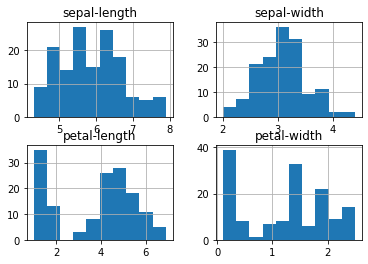

In [12]:
# histograms
flowers.hist() #DS delete parameters
plt.show()

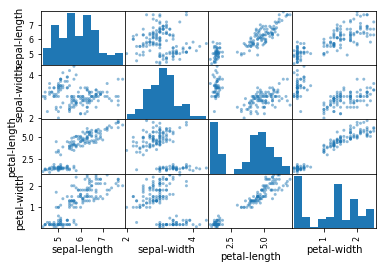

In [13]:
# scatter plot matrix #RA
pd.plotting.scatter_matrix(flowers)
plt.show()

**5.** Randomly split the dataset into training and testing data with a test data size of 20%. Display the dimentions of the training and testing datasets respectively.

[8 Marks]

In [ ]:
y = stats_final['Man of the Match']
X = stats_final.drop('Man of the Match', axis=1)
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
 #Scale - Ensure all PREpossesing is done
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train])

scaler.fit(X_test)
X_test = scaler.transform(X_test])

salaries.head()
print(X_test.shape)
print(X_train.shape)

In [14]:
# Split-out validation flowers
array = flowers.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training shape for inputs: ", X_train.shape)
print("Testing shape for inputs: ", X_validation.shape)
print("Training shape for results: ", Y_train.shape)
print("Testing shape for results: ", Y_validation.shape)

Training shape for inputs:  (117, 4)
Testing shape for inputs:  (30, 4)
Training shape for results:  (117,)
Testing shape for results:  (30,)


In [15]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
    

**6.** Build and evaluate different models:
* Train the following algorithms:
    - Logistic Regression.
    - K-Nearest Neighbour.
    - Decision Tree.
    - Suport Vector Machines.
* Determine the best model by using 10-fold cross-validation.
    - Provide the accuracy score, confusion matrix and classification report for each model.
    
[20 Marks]

In [ ]:
from sklearn.metrics import f1_score 
from sklearn.metrics import make_scorer

models.append(('LR', LogisticRegression(solver='liblinear', multi_class = 'ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma = 'auto')))

#testing models

results = []
names = []

f1= make_scorer(f1_score, average= 'weighted')
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
#PP! for all models, you delet pp1 1st line
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [16]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(metrics.accuracy_score(Y_validation, predictions))
    print(metrics.confusion_matrix(Y_validation, predictions))
    print(metrics.classification_report(Y_validation, predictions))

LR: 0.948485 (0.069416)
0.9
[[11  0  0]
 [ 0  7  3]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.70      0.82        10
 Iris-virginica       0.75      1.00      0.86         9

       accuracy                           0.90        30
      macro avg       0.92      0.90      0.89        30
   weighted avg       0.93      0.90      0.90        30

KNN: 0.973485 (0.040550)
0.9333333333333333
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

CART: 0.931061 (0.065121)
0.9333333333333333
[[11 

**7.** Compare the accuracy of the models by plotting the box plots for each model next to each other.

[2 Marks]

In [ ]:
plt.boxplot(results,names)
plt.title('Comparison of Classification Algorithms')
plt.show()

In [ ]:
#Comprae f1
#for f1 score
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')

#values=np.arange(0,10)
#print(values[1::2])

plt.boxplot(results[1::2])
ax = fig.add_subplot(111)
ax.set_xticklabels(names[1::2])
plt.show()

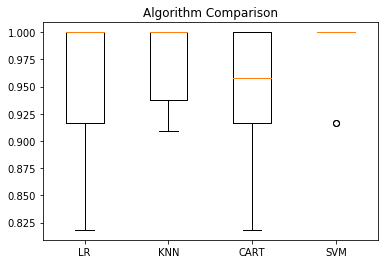

In [16]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [20]:
# Spot Check Algorithms
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []

f1 = make_scorer(f1_score, average='weighted')

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=f1)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(metrics.accuracy_score(Y_validation, predictions))
    print(metrics.confusion_matrix(Y_validation, predictions))
    print(metrics.classification_report(Y_validation, predictions))

LR: 0.948755 (0.069785)
0.9
[[11  0  0]
 [ 0  7  3]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.70      0.82        10
 Iris-virginica       0.75      1.00      0.86         9

       accuracy                           0.90        30
      macro avg       0.92      0.90      0.89        30
   weighted avg       0.93      0.90      0.90        30

KNN: 0.973551 (0.040436)
0.9333333333333333
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

CART: 0.933211 (0.062887)
0.9333333333333333
[[11 